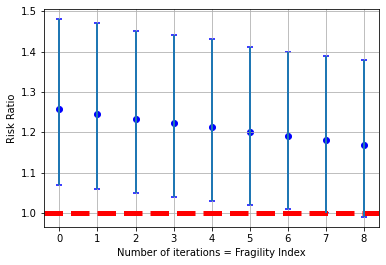

In [57]:
n1, n2 = 713, 713
x1, x2 = 68, 98
import numpy as np
import math
import matplotlib.pyplot as plt

def calculate_rr(x1, n1, x2, n2):
    pro1 = x1 / n1
    pro2 = x2 / n2
    return pro1 / pro2

def calculate_confidence_interval(RR, x1, n1, x2, n2):
    inside1 = ((n1 - x1) / x1) / n1
    inside2 = ((n2 - x2) / x2) / n2
    insidebig = inside1 + inside2

    sqrt = math.sqrt(insidebig)
    KN = sqrt * 1.96

    logRR = np.log(RR)
    logLL = logRR - KN
    logUL = logRR + KN

    LL = round(np.exp(logLL), 2)
    UL = round(np.exp(logUL), 2)
    
    return LL, UL

def plot_results(Y_list, LL_list, UL_list, RR_list):
    plt.scatter(Y_list, UL_list, marker="_", color="b")
    plt.scatter(Y_list, LL_list, marker="_", color="b")
    plt.scatter(Y_list, RR_list, marker="o", color="b")
    plt.xlabel("Number of iterations = Fragility Index")
    plt.ylabel("Risk Ratio")

    plt.grid()
    plt.axhline(y=1.0, color="r", linestyle="dashed", linewidth=5)
    plt.vlines(x=Y_list, ymin=LL_list, ymax=UL_list, linewidth=2)

    plt.show()

def main(x1,x2,n1,n2):
    x3, x4 = n1 - x1, n2 - x2

    UL_list, LL_list, RR_list, Y_list = [], [], [], []
    y = 0

    RR = calculate_rr(x1, n1, x2, n2)
    LL, UL = calculate_confidence_interval(RR, x1, n1, x2, n2)
    UL_list.append(UL)
    LL_list.append(LL)
    RR_list.append(RR)
    Y_list.append(y)

    if RR < 1:
        for i in range(0, 1000):
            x1 += 1
            x2 -= 1
            x3 = (n1 - x1) - 1
            RR = calculate_rr(x1, n1, x2, n2)
            LL, UL = calculate_confidence_interval(RR, x1, n1, x2, n2)


            UL_list.append(UL)
            LL_list.append(LL)
            RR_list.append(RR)
            y += 1
            Y_list.append(y)

            if UL > 1.0:
                plot_results(Y_list, LL_list, UL_list, RR_list)

                break
    else:
        for i in range(0, 1000):
            x2 += 1
            x1 -= 1
            x3 = (n1 - x1) - 1

            RR = calculate_rr(x1, n1, x2, n2)
            LL, UL = calculate_confidence_interval(RR, x1, n1, x2, n2)

            UL_list.append(UL)
            LL_list.append(LL)
            RR_list.append(RR)
            y += 1
            Y_list.append(y)

            if LL < 1:

                plot_results(Y_list, LL_list, UL_list, RR_list)

                break

main(250,199,1000,1000)